In [99]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Hopfield_Net():
    """
        - X is the input matrix where each column is a sample
        - W is a matrix of the weights.
        
    """
    def __init__(self, X):
        self.X = X
        self.D = X.shape[0] # Number of units
        self.N = X.shape[1] # Number of patterns
        self.W = self.init_W()
        self.max_iter = 10
        self.iters = 0
        self.pattern_dict = self.init_dict()
        self.attractor_dict = self.pattern_dict.copy()
    
    def init_W(self):
        W = np.zeros([self.D, self.D])
        for p in range(self.N):
            x = self.X[:,p]
            for i in range(self.D):
                for j in range(self.D):
                    W[i,j] += x[i]*x[j]
        W = W - np.diag(np.diag(W))
        return W
    
    def init_dict(self): # Dict of patterns as row vectors
        pattern_dict = {}
        for p in range(self.N):
            pattern = self.X[:,p].reshape(1, self.D)
            pattern_dict[p] = pattern
        return pattern_dict
    
    def update_rule(self, x): # x is a row vector
        for i in range(self.D):
            sum = 0
            for j in range(self.D):
                sum += self.W[i,j]*x[0,j]
            x[0,i] = np.sign(sum)
        return x
    
    def update_W(self, x): # x is a row vector
        for i in range(self.D):
            for j in range(self.D):
                self.W[i,j] += x.T[i]*x.T[j]
        self.W = self.W - np.diag(np.diag(self.W))
        self.N += 1
        self.pattern_dict[self.N-1] = x.reshape(1, self.D)
        return self.W
    
    def add_attractor(self, x):
        self.attractor_dict[len(self.attractor_dict.keys())] = x.reshape(1, self.D)

    def net_out(self, x): # x is a row vector
        #self.W = self.update_W(x)
        #if np.array_equal(x, y):
        #y = np.sign(np.dot(self.W, x.T))
        y = self.update_rule(x)
        #print(y)
        in_pattern_dict = [(y == pattern).all() 
                      for pattern in self.pattern_dict.values()]
        if any(in_pattern_dict):
            fixed_point = np.nonzero(in_pattern_dict)[0][0]
            print("Converged to X-row {} after {} iterations".format(fixed_point+1, self.iters+1))
            return y
        elif np.array_equal(x, y):
            print("Stable. Did not change after last iteration.")
            in_attractor_dict = [(y == attractor).all() 
                      for attractor in self.attractor_dict.values()]
            if not any(in_attractor_dict):
                self.add_attractor(y)
            return y
        elif self.iters <= self.max_iter:
            self.iters += 1
            return self.update_rule(self.net_out(x))
        else:
            print("Reached maximum number of iterations.")
            self.iters = 0
            return y
    
    #def number_of_atractors:
        
    
    #def train(self):
    #    for idx in range(self.N):
    #        x = X[:,idx].reshape([self.D, 1])
    #        y = net_out(x)


### 3.1 Convergence and attractors

In [51]:
x1 = np.array([[-1, -1, 1, -1, 1, -1, -1, 1]])
x2 = np.array([[-1, -1, -1, -1, -1, 1, -1, -1]])
x3 = np.array([[-1, 1, 1, -1, -1, 1, -1, 1]])

x4 = np.array([[1, 1, 1, -1, -1, 1, -1, 1]])

In [52]:
X = np.concatenate((x1.T, x2.T, x3.T), axis = 1)

In [53]:
hop_net_1 = Hopfield_Net(x1.T)
hop_net_2 = Hopfield_Net(x2.T)
hop_net_3 = Hopfield_Net(x3.T)

In [54]:
hop_net_1.W + hop_net_2.W + hop_net_3.W

array([[ 0.,  1., -1.,  3.,  1., -1.,  3., -1.],
       [ 1.,  0.,  1.,  1., -1.,  1.,  1.,  1.],
       [-1.,  1.,  0., -1.,  1., -1., -1.,  3.],
       [ 3.,  1., -1.,  0.,  1., -1.,  3., -1.],
       [ 1., -1.,  1.,  1.,  0., -3.,  1.,  1.],
       [-1.,  1., -1., -1., -3.,  0., -1., -1.],
       [ 3.,  1., -1.,  3.,  1., -1.,  0., -1.],
       [-1.,  1.,  3., -1.,  1., -1., -1.,  0.]])

In [55]:
hop_net = Hopfield_Net(X)

In [56]:
hop_net.W

array([[ 0.,  1., -1.,  3.,  1., -1.,  3., -1.],
       [ 1.,  0.,  1.,  1., -1.,  1.,  1.,  1.],
       [-1.,  1.,  0., -1.,  1., -1., -1.,  3.],
       [ 3.,  1., -1.,  0.,  1., -1.,  3., -1.],
       [ 1., -1.,  1.,  1.,  0., -3.,  1.,  1.],
       [-1.,  1., -1., -1., -3.,  0., -1., -1.],
       [ 3.,  1., -1.,  3.,  1., -1.,  0., -1.],
       [-1.,  1.,  3., -1.,  1., -1., -1.,  0.]])

In [57]:
hop_net.net_out(np.copy(x4))

Converged to X-row 3 after 1 iterations


array([[-1,  1,  1, -1, -1,  1, -1,  1]])

In [58]:
x1d = np.array([[1, -1, 1, -1, 1, -1, -1, 1]])
x2d = np.array([[1, 1, -1, -1, -1, 1, -1, -1]])
x3d = np.array([[1, 1, 1, -1, 1, 1, -1, 1]])

In [59]:
x4d = np.array([[1, 1, -1, 1, 1, 1, -1, -1]]) #np.array([[-1, -1, 1, -1, 1, -1, -1, 1]])
#x2d = np.array([[1, 1, -1, -1, -1, 1, -1, -1]]) #np.array([[-1, -1, -1, -1, -1, 1, -1, -1]])
#x3d = np.array([[1, -1, -1, -1, -1, 1, -1, 1]]) #np.array([[-1, 1, 1, -1, -1, 1, -1, 1]])

In [60]:
hop_net.net_out(np.copy(x4d))

Stable. Did not change after last iteration.


array([[ 1, -1, -1,  1, -1,  1,  1, -1]])

In [61]:
for i1 in [-1, 1]:
    for i2 in [-1, 1]:
        for i3 in [-1, 1]:
            for i4 in [-1, 1]:
                for i5 in [-1, 1]:
                    for i6 in [-1, 1]:
                        for i7 in [-1, 1]:
                            for i8 in [-1, 1]:
                                xRun = np.array([i1,i2,i3,i4,i5,i6,i7,i8]).reshape(1,8)
                                hop_net.net_out(np.copy(xRun))
                                
    
    

Converged to X-row 2 after 1 iterations
Converged to X-row 1 after 1 iterations
Stable. Did not change after last iteration.
Converged to X-row 1 after 1 iterations
Converged to X-row 2 after 1 iterations
Stable. Did not change after last iteration.
Converged to X-row 2 after 1 iterations
Converged to X-row 3 after 1 iterations
Converged to X-row 1 after 1 iterations
Converged to X-row 1 after 1 iterations
Stable. Did not change after last iteration.
Stable. Did not change after last iteration.
Converged to X-row 2 after 1 iterations
Stable. Did not change after last iteration.
Stable. Did not change after last iteration.
Stable. Did not change after last iteration.
Stable. Did not change after last iteration.
Converged to X-row 1 after 1 iterations
Stable. Did not change after last iteration.
Stable. Did not change after last iteration.
Converged to X-row 2 after 1 iterations
Converged to X-row 3 after 1 iterations
Stable. Did not change after last iteration.
Stable. Did not change af

In [62]:
hop_net.attractor_dict #18 attractors

{0: array([[-1, -1,  1, -1,  1, -1, -1,  1]]),
 1: array([[-1, -1, -1, -1, -1,  1, -1, -1]]),
 2: array([[-1,  1,  1, -1, -1,  1, -1,  1]]),
 3: array([[ 1, -1, -1,  1, -1,  1,  1, -1]]),
 4: array([[ 1, -1, -1,  1,  1, -1,  1, -1]]),
 5: array([[-1, -1,  1, -1, -1,  1, -1,  1]]),
 6: array([[ 1, -1,  1,  1,  1, -1,  1,  1]]),
 7: array([[ 1,  1, -1,  1,  1, -1,  1, -1]]),
 8: array([[ 1,  1,  1,  1,  1, -1,  1,  1]]),
 9: array([[ 1,  1, -1,  1, -1,  1,  1, -1]]),
 10: array([[ 1, -1,  1, -1,  1, -1, -1,  1]]),
 11: array([[-1, -1, -1,  1,  1, -1,  1, -1]]),
 12: array([[-1,  1,  1, -1,  1, -1, -1,  1]]),
 13: array([[-1,  1, -1,  1, -1,  1,  1, -1]]),
 14: array([[-1, -1, -1,  1, -1,  1, -1, -1]]),
 15: array([[-1,  1, -1, -1, -1,  1, -1, -1]]),
 16: array([[ 1,  1,  1, -1,  1, -1,  1,  1]]),
 17: array([[ 1,  1,  1, -1, -1,  1, -1,  1]])}

In [63]:
hop_net.pattern_dict

{0: array([[-1, -1,  1, -1,  1, -1, -1,  1]]),
 1: array([[-1, -1, -1, -1, -1,  1, -1, -1]]),
 2: array([[-1,  1,  1, -1, -1,  1, -1,  1]])}

### 3.2 Sequential update

In [100]:
pict = [i.split(',') for i in open("pict.dat").readlines()]

In [101]:
int_pict = [int(i) for i in pict[0]]

In [102]:
all_pics = [int_pict[i:i + 1024] for i in range(0, len(int_pict), 1024)]

In [103]:
p1 = all_pics[0]

In [104]:
p1 = np.array([all_pics[0]])
p2 = np.array([all_pics[1]])
p3 = np.array([all_pics[2]])
p4 = np.array([all_pics[3]])
p5 = np.array([all_pics[4]])
p6 = np.array([all_pics[5]])
p7 = np.array([all_pics[6]])
p8 = np.array([all_pics[7]])
p9 = np.array([all_pics[8]])
p10 = np.array([all_pics[9]])
p11 = np.array([all_pics[10]])

In [105]:
def disp_pic(pic):
    pic = pic[0].tolist()
    start = 0
    for row_id in range(32):
        end = start + 32
        row = pic[start:end]
        for col_id, pix in enumerate(row):
            if pix == 1:
                plt.plot(row_id, col_id, 'o', color = 'black')
            else:
                plt.plot(row_id, col_id, 'o', color = 'whitesmoke')
        start = end
        

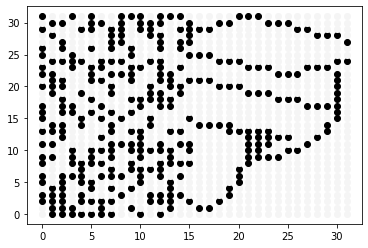

In [106]:
disp_pic(p10)

In [92]:
p1.shape

(1, 1024)

In [145]:
X = np.concatenate((p1.T, p2.T, p3.T), axis = 1)
X = np.concatenate((p1.T, p3.T), axis = 1)

In [146]:
X.shape

(1024, 2)

In [147]:
hop_net = Hopfield_Net(X)

In [ ]:
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
disp_pic(p1)
plt.subplot(1, 2, 2)
disp_pic(p10)

In [153]:
new_pic = np.copy(hop_net.net_out(np.copy(p10)))

Converged to X-row 1 after 1 iterations


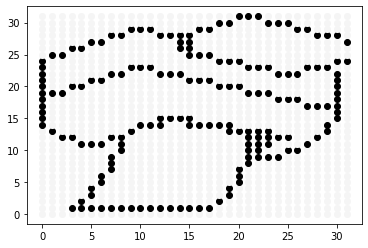

In [154]:
disp_pic(new_pic)

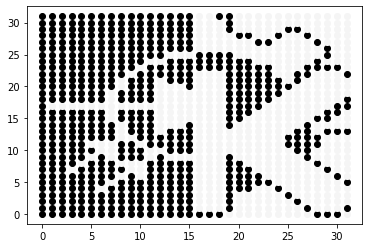

In [143]:
disp_pic(p11)

In [20]:
hop_net.pattern_dict

{0: array([[-1, -1, -1, ..., -1, -1, -1]]),
 1: array([[-1, -1, -1, ..., -1, -1, -1]]),
 2: array([[1, 1, 1, ..., 1, 1, 1]])}